In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2019
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Lokale Suche"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, XX.X.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung



## Referenzen
 * [Peter Norvig's take](https://github.com/norvig/pytudes/blob/master/ipynb/TSP.ipynb)
 * [Overview of the TSP problem](http://www.math.uwaterloo.ca/tsp/index.html)
 * [Genetic algorithm](http://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5)
 * [Simulated Annealing](http://www.theprojectspot.com/tutorial-post/simulated-annealing-algorithm-for-beginners/6)

## Das sogenannte TSP-Problem

Das Finden einer kürzesten Reiseroute hat eine große Zahl praktischer Anwendungen wie z.B. Navigationssysteme
oder die Steuerung von Lötrobotern. <br> Beim sogenannten “Traveling Salesperson Problem” werden eine Anzahl von
Städten (Knoten) vorgegeben, die durch Straßen (edges) verbunden sind. Ihre Aufgabe ist es einen Algorithmus zu
entwickeln, der alle Städte auf einer möglichst kurzen Route besucht. Jede Stadt muss dabei <b>genau einmal</b> besucht werden. <br>
Städte werden mit IDs von 0...N-1 benannt, wobei N die Anzahl der Städte ist. Eine Tour beginnt immer in der Stadt mit der ID 0 und endet dort auch.

*Finding a shortest route has a large number of practical applications, e.g. navigation systems or the control of soldering robots.
The "Traveling Salesperson Problem" specifies a number of cities (nodes) connected by roads (edges). Your task is to develop an algorithm that visits all cities on the shortest possible route. Each city can be visited any number of times and every street can be used as often as you like.<br>
Cities are named with IDs from 0 ... N-1, where N is the number of cities. A tour always starts in the city with the ID 0 and ends there.*

Möglicherweise geeignete Algorithmen für das Problem:<br>
*Possibly suitable algorithms for the problem:*

* Brute force
* Greedy best-first search
* Simulated Annealing
* Genetic Algorithms
* Ant colony optimization

## Problemverständnis

![Beispiel_TSP](img/exercise5/tsp_5towns.png)

<div class="task_description">
    <i class="task">Task 5.1:</i> <br>
</div>
Betrachten Sie das Beispiel mit fünf Städten in Abb. 1. Zur visuellen Unterscheidung von den Fahrtzeiten sind Städte hier mit Buchstaben statt Zahlen kodiert.

1. Berechnen Sie die Fahrtzeit auf der “naiven” Route [A, B, C, D, E, A].
2. Ermitteln Sie händisch die Fahrtzeit mittels der Strategie “greedy best-first”.
3. Berechnen Sie die Anzahl der möglichen Routen (= Permutationen) für diese Karte.

*Consider the example with five cities in Abb. 1. To visually differentiate the travel times, cities are coded with letters instead of numbers.* <br>
1. *Calculate the travel time on the "naive" route [A, B, C, D, E, A].*
2. *Determine manually the travel time by means of the strategy "greedy best-first".*
3. *Calculate the number of possible routes (= permutations) for this map.*

<strong style="color: blue">Lösung:</strong>

1. 10 + 100 + 8 +   3 + 7 = 128
2.  5 +   3 + 2 + 100 + 6 = 116 auf der Route [A, D, E, B, C, A]
3. Wird berechnet durch die Faktultät von n. Hier mit n = 5 -> 120

<div class="task_description">
    <i class="task">Task 5.2:</i> <br>

Stellen Sie sich nun größere Karten der Größe 10, 15, 20, und 100 vor. Nehmen Sie an, der Startpunkt sei
vorgegeben. Wie viele mögliche Permutationen gibt es? Ist die "Brute-ForceMethode eine sinnvolle Strategie?
</div>

*Imagine bigger cards of size 10, 15, 20, and 100. Suppose the starting point is given. How many possible permutations are there? Is the brute-force method a sensible strategy?*

<strong style="color: blue">Lösung:</strong>

| n | n!|
| --- | --- |
| 10 |&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 3628800   |
| 15 | $1,308 * 10^{12}$ |
| 20 | $2,432 * 10^{18}$ |
| 100 | $9,332 * 10^{157}$ |


## Code

Folgenden Code stellen wir zur Verfügung. Versuchen Sie sich einen Überblick über die Funktionen zu verschaffen.

*We provide the following code. Try to get an overview of the functions.*

365 cities ⇒ tour length 109882


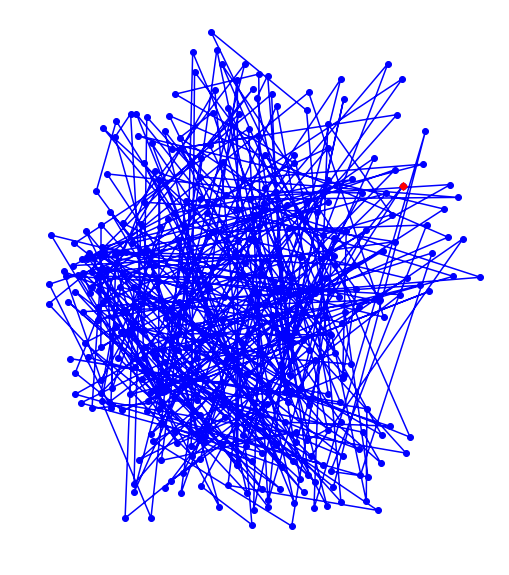

In [21]:
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from itertools import permutations
from random import shuffle, randrange
import pandas


def tour_length(cities, tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(get_dist(cities, tour[i - 1], tour[i]) 
               for i in range(len(tour)))

def is_valid_tour(tour, gold):
    if (len(tour) != len(gold)):
        print("Not the same number of cities as in reference:", len(tour), len(gold))
        return False
    
    t1 = set(tour)
    t2 = set(gold)
    diff = t1 ^ t2
    if (len(diff) > 0):
        print("Spurious cities in tour:", diff)
        return False
    
    return True

def plot_tour(cities, tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    print("{} cities ⇒ tour length {:.0f}".format(len(tour), tour_length(cities, tour)))

    plt.figure(figsize=(10,10))
    start = tour[0:1]
    plot_segment(cities, tour + start, style)
    plot_segment(cities, start, 'rD') # start city is red Diamond.
    
def plot_segment(cities, segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(cities, i) for i in segment], [Y(cities, i)*1.4 for i in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')
    
def X(cities, i): "X coordinate."; return cities.loc[i,'lng']
def Y(cities, i): "Y coordinate."; return cities.loc[i,'lat']

def get_dist(cities, i, j):
    """Compute the distance between two citites from their longitude and latitude values"""

    lat1 = cities.loc[i,'lat']
    lng1 = cities.loc[i,'lng']
    lat2 = cities.loc[j,'lat']
    lng2 = cities.loc[j,'lng']
    
    r = 6371 # radius of the earth in km
    lat1=radians(lat1)
    lat2=radians(lat2)
    lat_dif=lat2-lat1
    lng_dif=radians(lng2-lng1)
    a=sin(lat_dif/2.0)**2+cos(lat1)*cos(lat2)*sin(lng_dif/2.0)**2
    d=2*r*asin(sqrt(a))
    
    return d

# data from https://simplemaps.com/data/de-cities
cities = pandas.read_csv('data/tsp/de.csv')

tour = [x for x in list(cities.index.values)]

# tour in order of the city IDs
plot_tour(cities, tour)

<div class="task_description">
    <i class="task">Task 5.3:</i> <br>

Implementieren Sie einen Solver der zufällig generierte Touren ausgibt.
</div>

*Implement a solver that outputs randomly generated tours.*

In [ ]:
def random(cities, n):
    tour = [x for x in list(cities.index.values)]
    
    min_tour = tour
    min_tour_len = tour_length(cities, tour)
    for i in range(n):
        shuffle(tour)
        tour_len = tour_length(cities, tour)
        if tour_len < min_tour_len:
            min_tour_len = tour_len
            min_tour = list(tour)
            print("currently shortest: {:.0f}".format(min_tour_len))

    return min_tour

random_tour = random(cities, 500)
is_valid_tour(random_tour, tour)
plot_tour(cities, random_tour)          

currently shortest: 108954
currently shortest: 106356
currently shortest: 105471


<div class="task_description">
    <i class="task">Task 5.4:</i> <br>

Analysieren Sie den unten stehenden Solver. Welche Strategie wird implementiert?
</div>

*Analyze the solver below. What strategy is being implemented?*

currently shortest: 108834
currently shortest: 107989
currently shortest: 107298
currently shortest: 106731
currently shortest: 106189
currently shortest: 105650
currently shortest: 105141
currently shortest: 104653
currently shortest: 104173
currently shortest: 103729
False
365 cities ⇒ tour length 103729


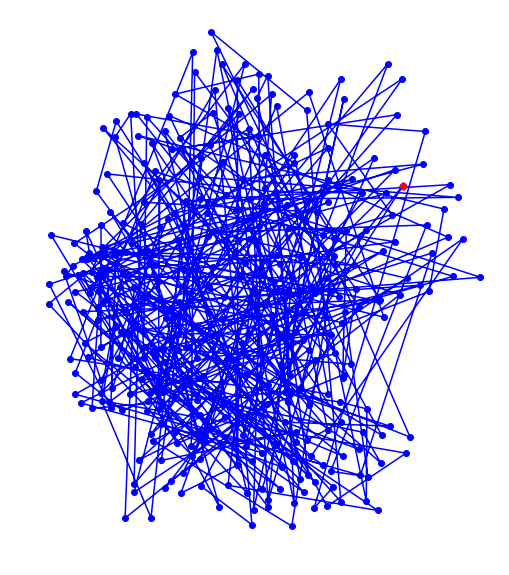

In [13]:
def xyz(cities, n):
    # start with random tour
    tour = [x for x in list(cities.index.values)]
    
    min_tour = tour
    min_tour_len = tour_length(cities, tour)
    # n rounds
    for i in range(n):
        tour = local_best(cities, min_tour)
        tour_len = tour_length(cities, tour)
        if tour_len < min_tour_len:
            min_tour_len = tour_len
            min_tour = list(tour)
            print("currently shortest: {:.0f}".format(min_tour_len))

    return min_tour

def local_best(cities, tour):
    min_tour = tour
    min_tour_len = tour_length(cities, tour)
    for i in range(len(tour)-1):
        # swap
        tour[i], tour[i+1] = tour[i+1], tour[i]
        tour_len = tour_length(cities, tour)
        if tour_len < min_tour_len:
            min_tour_len = tour_len
            min_tour = list(tour)
        # swap back
        tour[i], tour[i+1] = tour[i+1], tour[i]
            
    return min_tour
    
new_tour = xyz(cities, 10)
is_valid_tour(new_tour, tour)
plot_tour(cities, new_tour)  

<strong style="color: blue">Lösung:</strong>

Es wird Hill-Climbing implementiert. Gestartet wird mit einer zufälligen Route und diese wird auf lokale Verbesserungsmöglichkeiten hin untersucht. Die beste lokale Optimierung wird durchgeführt. Insgesamt wird hier n (10) mal nach einer weiteren Verbesserung gesucht. 

# Hausübung

Bei der Abgabe der Übungen ist folgendes zu beachten:

<ul>
    <li> Abgaben sollten immer als Gruppe eingereicht werden. <b>Einzelabgaben werden nicht bewertet.</b> </li>
    <li> Die Abgabe hat in Form eines Jupyter Notebooks zu erfolgen. Wenn Sie mehrere Dokumente abgeben wollen (z.B. zusätzliche Bilder), sollten diese als Zip-Datei abgegeben werden. </li>
</ul>

<div class="task_description">
    <i class="task">Homework 5.1:</i>
        :::2 Hausaufgabenpunkte :::</div>
       
Ermitteln Sie die Fahrtzeit mit der Strategie “Greedy-Best-First” anhand des Kartenbeispiels für 6
Städte. Der Startpunkt ist E. Notieren Sie ausserdem die Reihenfolge, in der die Knoten besucht
werden. <br>
Falls Ihnen die Implementierung des Problems nicht gelingt, können Sie den Pfad auch manuell berechnen. Kommentieren Sie in diesem Fall jeden Schritt.        

*Determine the travelling time with the strategy "Greedy-Best-First" using the map example for 6 cities. The starting point is E. Also note the order in which the nodes are visited.* <br>
*If you are unable to implement the problem, you can also calculate the path manually. In this case, comment each step.*

![Beispiel_TSP](img/exercise5/tsp_6towns.png)


<div class="task_description">
    <i class="task">Homework 5.2:</i>
        :::8 Hausaufgabenpunkte :::</div>

Erstellen Sie eine Python-Implementierung basierend auf dem Code der Präsenzaufgabe, die auf der Deutschland-Tour eine Länge von 11.000 nicht überschreitet. 
Geben Sie ergänzend zum Code Ihre Lösung des TSP-Problems für die Deutschland-Karte als Reihenfolge der besuchten Knoten (siehe Variable tour) ab.<br>
Hinweise:
* Es dürfen keine externen Bibliotheken verwendet werden, die einen Solver direkt implementieren, jedoch Bibliotheken mit Hilfsfunktionen.
* Mit dieser Aufgabe nehmen Sie zeitgleich auch an der Challenge teil.
* Beachten Sie, dass wir für die Challenge auf unbekannten Daten testen werden. Vermeiden Sie daher Overfitting.


*Create a Python implementation based on the code above that does not exceed 11,000 in length on the Germany tour. 
In addition to the code, enter your solution to the TSP problem for the Germany map as the order of the visited nodes (see Variable tour).*<br>
Notes:
* *No external libraries may be used that implement a solver directly, but libraries with auxiliary functions may be used.*
* *With this task, you also take part in the challenge at the same time.*
* *Note that we will test for the challenge on unknown data. Avoid overfitting.*

<div class="task_description">
    <i class="task">Homework 5.3:</i>
        :::1 Extra-Klausurbonuspunkt :::</div>
Ein Extra-Klausurbonuspunkt wird an die fünf bestplazierten Teams vergeben, Ziel ist es eine möglichst geringe Fahrtzeit zu erreichen. Die Endergebnisse werden in der Vorlesung sowie in einer Liste auf Moodle präsentiert.

*An additional exam bonus point is awarded to the five best placed teams with the aim of achieving the shortest possible driving time. The final results will be presented in the lecture and in a list on Moodle.*